# Plotting Query Results

## Setup

In [4]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect


In [7]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [8]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)

In [9]:
# Use Inspector to print the column names and types
inspector.get_table_names()

['emoji']

In [10]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
columns= inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])
engine.execute('select * from emoji limit 10').fetchall()


id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect database and Query

In [11]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [12]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [31]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
resp= session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
    order_by(Emoji.score.desc()).limit(20).all()

Unpack tuples using list comprehensions

In [33]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
em_id=[]
score=[]
for row in resp:
    em_id.append(row[1])
    score.append(row[2])

('😂', '1F602', 1814832150)
('❤️', '2764', 840619939)
('😍', '1F60D', 680382416)
('♥️', '2665', 652715459)
('😭', '1F62D', 515991922)
('😊', '1F60A', 484540701)
('♻️', '267B', 452489849)
('😒', '1F612', 441690175)
('💕', '1F495', 381679908)
('😘', '1F618', 377847645)
('😩', '1F629', 343967555)
('☺️', '263A', 333263710)
('👌', '1F44C', 311468371)
('😔', '1F614', 283873968)
('😏', '1F60F', 275930731)
('😁', '1F601', 268504794)
('⬅️', '2B05', 225109999)
('😉', '1F609', 210995480)
('👍', '1F44D', 186214004)
('😌', '1F60C', 180720579)
20


In [35]:
print(em_id)
print(score)

['1F602', '2764', '1F60D', '2665', '1F62D', '1F60A', '267B', '1F612', '1F495', '1F618', '1F629', '263A', '1F44C', '1F614', '1F60F', '1F601', '2B05', '1F609', '1F44D', '1F60C']
[1814832150, 840619939, 680382416, 652715459, 515991922, 484540701, 452489849, 441690175, 381679908, 377847645, 343967555, 333263710, 311468371, 283873968, 275930731, 268504794, 225109999, 210995480, 186214004, 180720579]


## Plot using Matplotlib

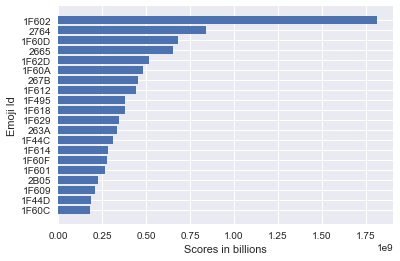

In [41]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.barh(em_id[::-1], score[::-1])
plt.xlabel("Scores in billions")
plt.ylabel("Emoji Id")
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [44]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df=pd.DataFrame(resp, columns=['emoji_char', 'emoji_id', 'score'])
del df['emoji_char']
df.head(10)

,emoji_id,score
0,1F602,1814832150
1,2764,840619939
2,1F60D,680382416
3,2665,652715459
4,1F62D,515991922
5,1F60A,484540701
6,267B,452489849
7,1F612,441690175
8,1F495,381679908
9,1F618,377847645


Plot using Pandas

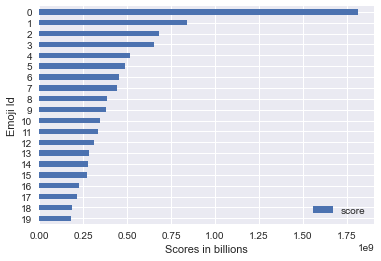

In [47]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
ax=df.plot.barh(y='score')
plt.xlabel("Scores in billions")
plt.ylabel("Emoji Id")
ax.invert_yaxis()

In [50]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
conn=engine.connect()
new_df=pd.read_sql('select * from emoji', conn)
new_df

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
...,...,...,...,...,...
840,841,🛂,1F6C2,PASSPORT CONTROL,103654
841,842,🔠,1F520,INPUT SYMBOL FOR LATIN CAPITAL LETTERS,103234
842,843,🔡,1F521,INPUT SYMBOL FOR LATIN SMALL LETTERS,101160
843,844,🚱,1F6B1,NON-POTABLE WATER SYMBOL,92412
